In [1]:
#coding:utf-8
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [77]:
path = r'D:\kaggle\titanic'
raw_train_data = pd.read_csv(path + '\\train.csv')
#print(raw_train_data.describe())
# print(raw_train_data.head())


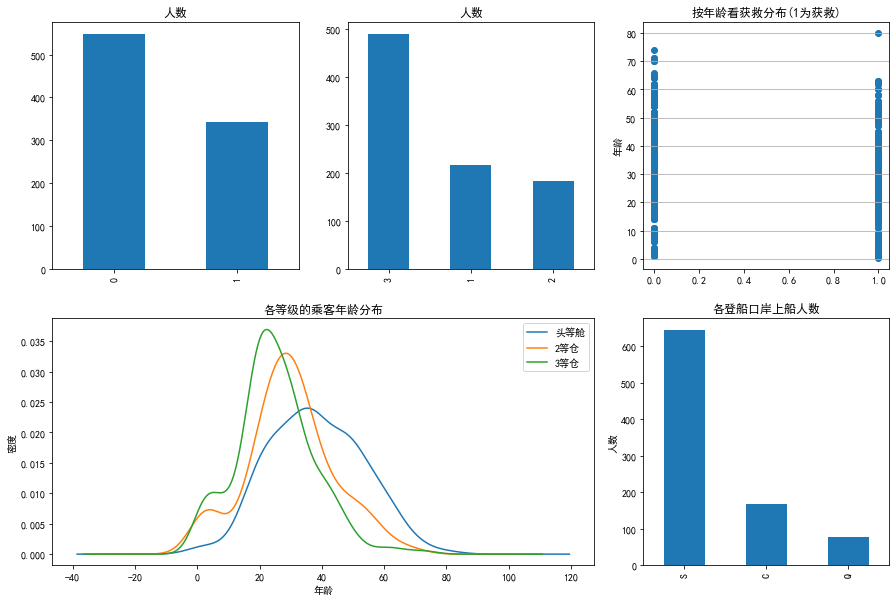

In [34]:
fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
raw_train_data.Survived.value_counts().plot(kind='bar')
plt.title("获救情况(1为获救)")
plt.title("人数")

plt.subplot2grid((2,3),(0,1))
raw_train_data.Pclass.value_counts().plot(kind='bar')
plt.title("乘客等级分布")
plt.title("人数")

plt.subplot2grid((2,3),(0,2))
plt.scatter(raw_train_data.Survived,raw_train_data.Age)
plt.ylabel("年龄")
plt.grid(b=True,which='major',axis='y')
plt.title("按年龄看获救分布(1为获救)")


plt.subplot2grid((2,3),(1,0),colspan=2)
raw_train_data.Age[raw_train_data.Pclass == 1].plot(kind='kde')
raw_train_data.Age[raw_train_data.Pclass == 2].plot(kind='kde')
raw_train_data.Age[raw_train_data.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")
plt.ylabel("密度")
plt.title("各等级的乘客年龄分布")
plt.legend(('头等舱','2等仓','3等仓'),loc='best')


plt.subplot2grid((2,3),(1,2))
raw_train_data.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数")
plt.show()

<Figure size 432x288 with 0 Axes>

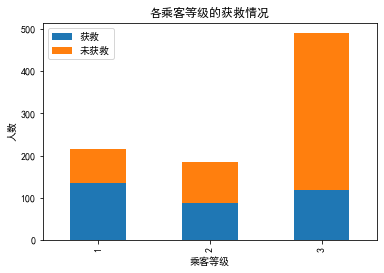

In [35]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = raw_train_data.Pclass[raw_train_data.Survived == 0].value_counts()
Survived_1 = raw_train_data.Pclass[raw_train_data.Survived == 1].value_counts()
df = pd.DataFrame({'获救':Survived_1,'未获救':Survived_0})
df.plot(kind = 'bar', stacked = True)
plt.title('各乘客等级的获救情况')
plt.xlabel('乘客等级')
plt.ylabel('人数')
plt.show()

<Figure size 432x288 with 0 Axes>

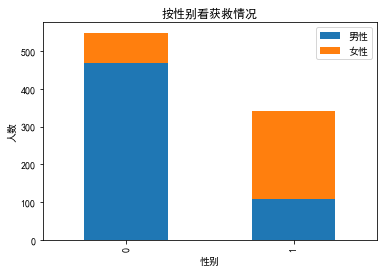

In [36]:
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_m = raw_train_data.Survived[raw_train_data.Sex == 'male'].value_counts()
Survived_f = raw_train_data.Survived[raw_train_data.Sex == 'female'].value_counts()
df = pd.DataFrame({u'男性':Survived_m,u'女性':Survived_f})
df.plot(kind = 'bar', stacked = True)
plt.title(u'按性别看获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')
plt.show()

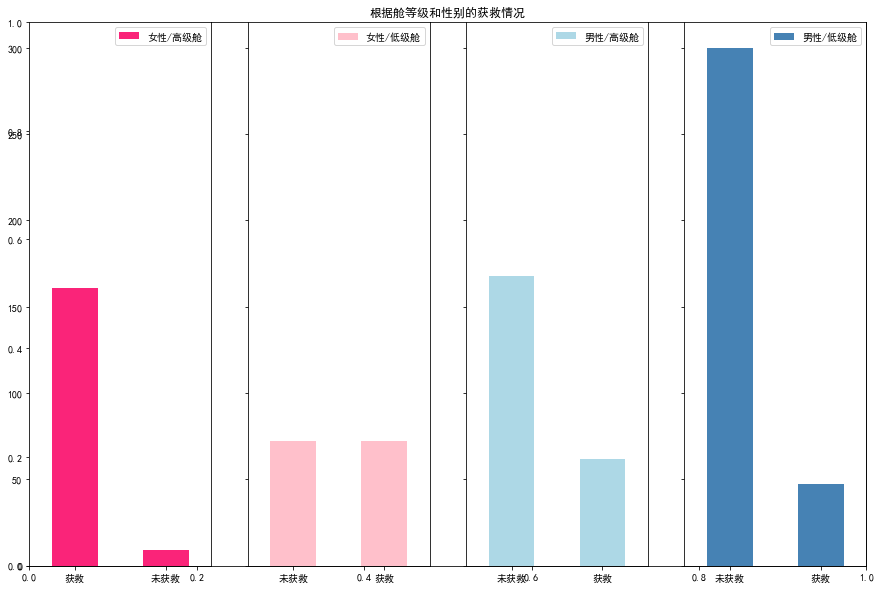

In [37]:
fig = plt.figure(figsize=(15,10))
fig.set(alpha=0.65)
plt.title(u'根据舱等级和性别的获救情况')

ax1 = fig.add_subplot(141)
raw_train_data.Survived[raw_train_data.Sex == 'female'][raw_train_data.Pclass != 3].value_counts().plot(kind='bar',label = 'female highclass',color = '#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
raw_train_data.Survived[raw_train_data.Sex == 'female'][raw_train_data.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
raw_train_data.Survived[raw_train_data.Sex == 'male'][raw_train_data.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
raw_train_data.Survived[raw_train_data.Sex == 'male'][raw_train_data.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

<Figure size 432x288 with 0 Axes>

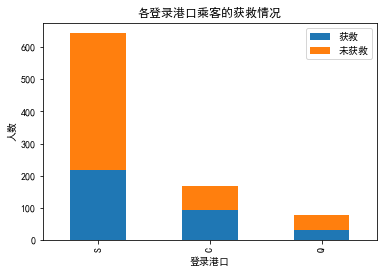

In [38]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = raw_train_data.Embarked[raw_train_data.Survived == 0].value_counts()
Survived_1 = raw_train_data.Embarked[raw_train_data.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title("各登录港口乘客的获救情况")
plt.xlabel("登录港口")
plt.ylabel("人数")

plt.show()

In [78]:
### 使用 RandomForestClassifier 填补缺失的年龄属性，实际验证发现效果不佳，改为直接用均值填充
def set_missing_ages(df):
#     # 把已有的数值型特征取出来丢进Random Forest Regressor中
#     age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]

#     # 乘客分成已知年龄和未知年龄两部分
#     known_age = age_df[age_df.Age.notnull()].values
#     unknown_age = age_df[age_df.Age.isnull()].values

#     # y即目标年龄
#     y = known_age[:, 0]

#     # X即特征属性值
#     X = known_age[:, 1:]

#     # fit到RandomForestRegressor之中
#     rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
#     rfr.fit(X, y)

#     # 用得到的模型进行未知年龄结果预测
#     predictedAges = rfr.predict(unknown_age[:, 1::])

#     # 用得到的预测结果填补原缺失数据
#     df.loc[(df.Age.isnull()), 'Age'] = predictedAges

    df.Age.fillna(df.Age.mean(),inplace = True)
    df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

    return df


raw_train_data = set_missing_ages(raw_train_data)

#将Embarked,Sex,Pclass转换成为onehot编码
dummies_Embarked = pd.get_dummies(raw_train_data['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(raw_train_data['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(raw_train_data['Pclass'], prefix= 'Pclass')

df = pd.concat([raw_train_data, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['PassengerId','Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.drop([159,180,201,324,792,846,863])    #删除原数据中sibsp的离群值8所涉及的行
df.drop([678])    #删除原数据中parch的离群值6所涉及的行
df['Title'] = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
df['Title']=df['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer', 'Master'],'Rare')
df['Title']=df['Title'].replace(['Dona', 'Mlle', 'Ms'],'Miss')
df['Title']=df['Title'].replace(['Mme','Mrs'],'Mr')
dummies_Title = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, dummies_Title],axis = 1)
df.drop(['Name','Title'], axis=1, inplace=True)

train_label = df['Survived']
train_titanic = df.drop('Survived',1)    #1指删除列--axis=1，默认是0

# print(train_titanic.head())
# print(train_titanic.head(20))
# print(train_titanic.isnull().any())
# print(train_label.shape)



In [79]:
# 使用随机森林分类器
rfc = RandomForestClassifier(random_state=40, n_estimators=15, min_samples_split=2, min_samples_leaf=1)
kf = model_selection.KFold(n_splits=10,shuffle=False, random_state=None)
scores = model_selection.cross_val_score(rfc, train_titanic, train_label, cv=kf)
print('rfc score:',scores.mean())

rfc score: 0.7968913857677903


In [82]:
# 使用逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(train_titanic,train_label,test_size=.35,random_state=0)
lr = LogisticRegression(random_state = 40)
lr.fit(x_train, y_train)
print('lr score:',lr.score(x_test,y_test))

lr score: 0.8012820512820513


D:\anaconda3\envs\d2l-zh\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
# 使用决策树分类器
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' :range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

# grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search_dt.fit(x_train, y_train)
# grid_search_dt.best_params_
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 9, min_samples_leaf = 6,min_samples_split = 8, splitter = 'random')
dtc.fit(x_train, y_train)
print('dtc score:', dtc.score(x_test,y_test))

dtc score: 0.8076923076923077


In [89]:
# 使用梯度提升分类器
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance','exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators' : [100,150,180,200]
}

# grid_search_gbc = GridSearchCV(gbc,parameters, cv = 5, n_jobs = -1, verbose = 1)
# grid_search_gbc.fit(x_train, y_train)
# grid_search_gbc.best_params_
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 100)
gbc.fit(x_train, y_train)
print('gbc score:',gbc.score(x_test,y_test))

gbc score: 0.8365384615384616


In [91]:
# 使用支持向量分类器
from sklearn.svm import SVC

svc = SVC()
parameters = {
    'gamma' : [0.0001, 0.001, 0.01],
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

# grid_search = GridSearchCV(svc, parameters)
# grid_search.fit(x_train, y_train)
# grid_search.best_params_
svc = SVC(C = 20, gamma = 0.001)
svc.fit(x_train, y_train)
print(svc.score(x_test, y_test))

0.7756410256410257


In [92]:
# 导入测试集的数据，并将数据和测试集上的数据进行一样的处理
raw_test_data = pd.read_csv(path + '\\test.csv')
raw_test_data.Fare = raw_test_data.Fare.fillna(raw_test_data.Fare.mean())
raw_test_data = set_missing_ages(raw_test_data)
dummies_Embarked = pd.get_dummies(raw_test_data['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(raw_test_data['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(raw_test_data['Pclass'], prefix= 'Pclass')

df_test = pd.concat([raw_test_data,dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test_pid = pd.DataFrame(df_test.PassengerId)
df_test.drop(['PassengerId','Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Title'] = df_test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
df_test['Title']=df_test['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer', 'Master'],'Rare')
df_test['Title']=df_test['Title'].replace(['Dona', 'Mlle', 'Ms'],'Miss')
df_test['Title']=df_test['Title'].replace(['Mme','Mrs'],'Mr')
dummies_Title = pd.get_dummies(df_test['Title'], prefix='Title')
df_test = pd.concat([df_test, dummies_Title],axis = 1)
df_test.drop(['Name','Title'], axis=1, inplace=True)
df_test.Age.fillna(df_test.Age.mean())
df_test[df_test.isnull().T.any()]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Rare


In [93]:
# 先用训练集上的数据训练处一个模型，再在测试集上进行预测，并将结果输出到一个csv文件中
# model = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 200)
# # model = LogisticRegression()
# model.fit(train_titanic, train_label)
# predictions = model.predict(df_test)


# 尝试使用bagging方法
from sklearn.ensemble import VotingClassifier
clf_vc = VotingClassifier(estimators = [('lr',LogisticRegression()),
                                        ('GBC',GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 200)),
                                        ('SVC',SVC(C = 20, gamma = 0.001)),
                                        ('RFC',RandomForestClassifier(random_state=40, n_estimators=15, min_samples_split=2, min_samples_leaf=1))])

clf_vc.fit(train_titanic, train_label)
predictions = clf_vc.predict(df_test)
result = pd.DataFrame({'PassengerId':df_test_pid['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("random_forest_predictions.csv", index=False)
print(pd.read_csv("random_forest_predictions.csv"))

D:\anaconda3\envs\d2l-zh\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [47]:
import os
os.getcwd() #获取当前工作路径

'C:\\Users\\Administrator'